In [73]:
# Carry Trade Strategy using Perpetual Futures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

%load_ext autoreload
%autoreload 2

In [74]:
from src.data.get_data import load_data

df_btc = load_data("BTCUSDT")
df_eth = load_data("ETHUSDT")

In [75]:
df_btc

,timestamp,fundingRate,closePrice
0,2019-09-10 08:00:00.000,0.000100,10098.15
1,2019-09-10 16:00:00.000,0.000100,10098.15
2,2019-09-11 00:00:00.000,0.000100,10158.33
3,2019-09-11 08:00:00.000,0.000100,10158.33
4,2019-09-11 16:00:00.000,0.000100,10158.33
...,...,...,...
6225,2025-05-16 08:00:00.000,0.000075,103463.90
6226,2025-05-16 16:00:00.000,0.000048,103463.90
6227,2025-05-17 00:00:00.000,0.000028,103254.47
6228,2025-05-17 08:00:00.001,0.000033,103254.47


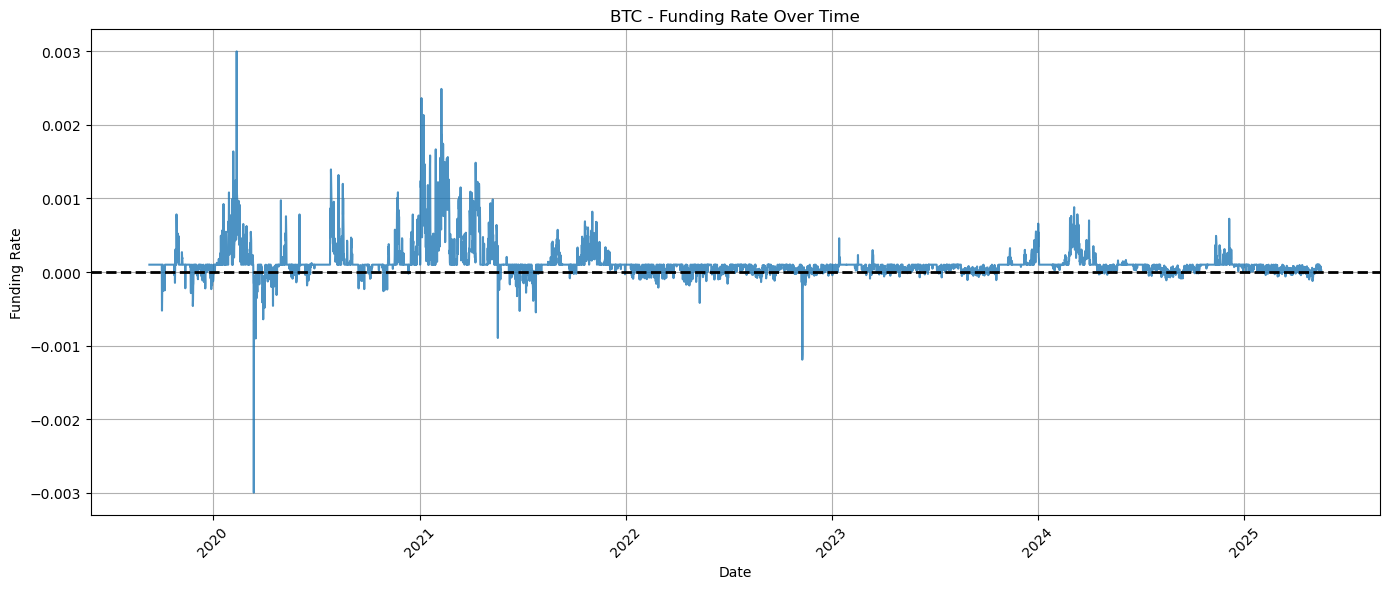

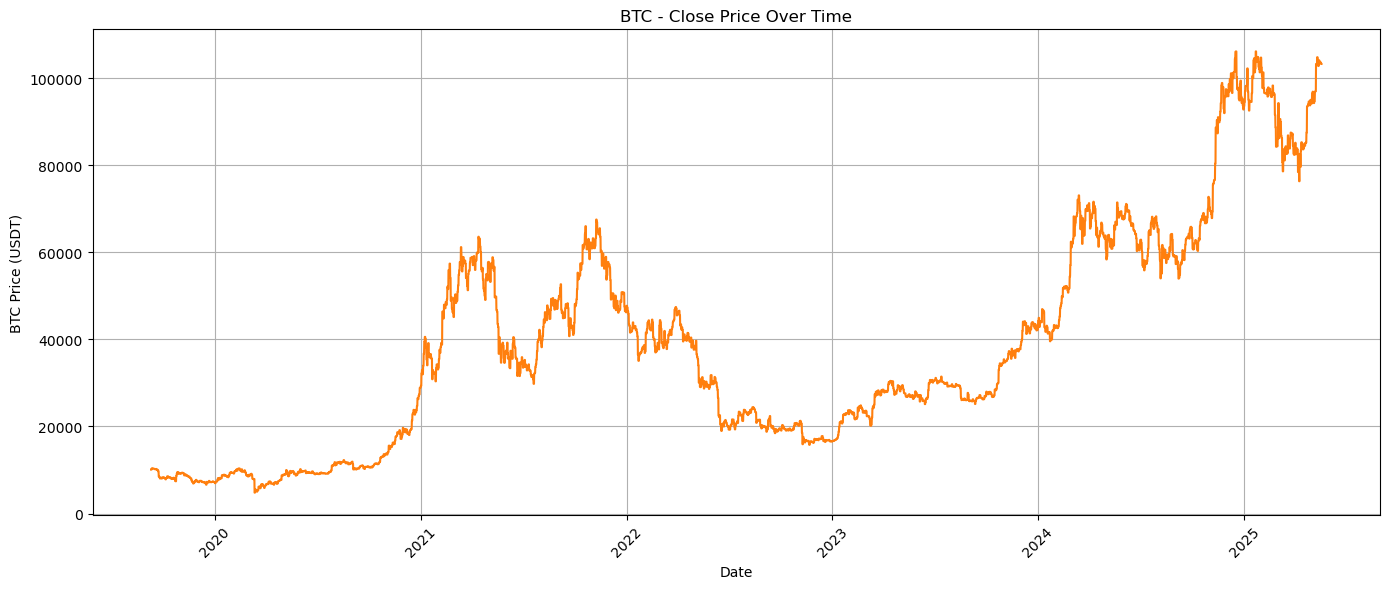

Saved plots to:
 - data/images/BTC_funding_rate.png
 - data/images/BTC_close_price.png


In [76]:
from src.utils.plot_data import plot_funding_and_price

plot_funding_and_price(df_btc, 'BTC')

In [77]:
df_eth

,timestamp,fundingRate,closePrice
0,2019-11-27 08:00:00.000,0.000100,152.62
1,2019-11-27 16:00:00.000,0.000100,152.62
2,2019-11-28 00:00:00.000,0.000100,150.72
3,2019-11-28 08:00:00.000,0.000014,150.72
4,2019-11-28 16:00:00.000,-0.000106,150.72
...,...,...,...
5991,2025-05-16 08:00:00.000,0.000100,2537.12
5992,2025-05-16 16:00:00.000,0.000072,2537.12
5993,2025-05-17 00:00:00.000,0.000025,2484.42
5994,2025-05-17 08:00:00.001,-0.000019,2484.42


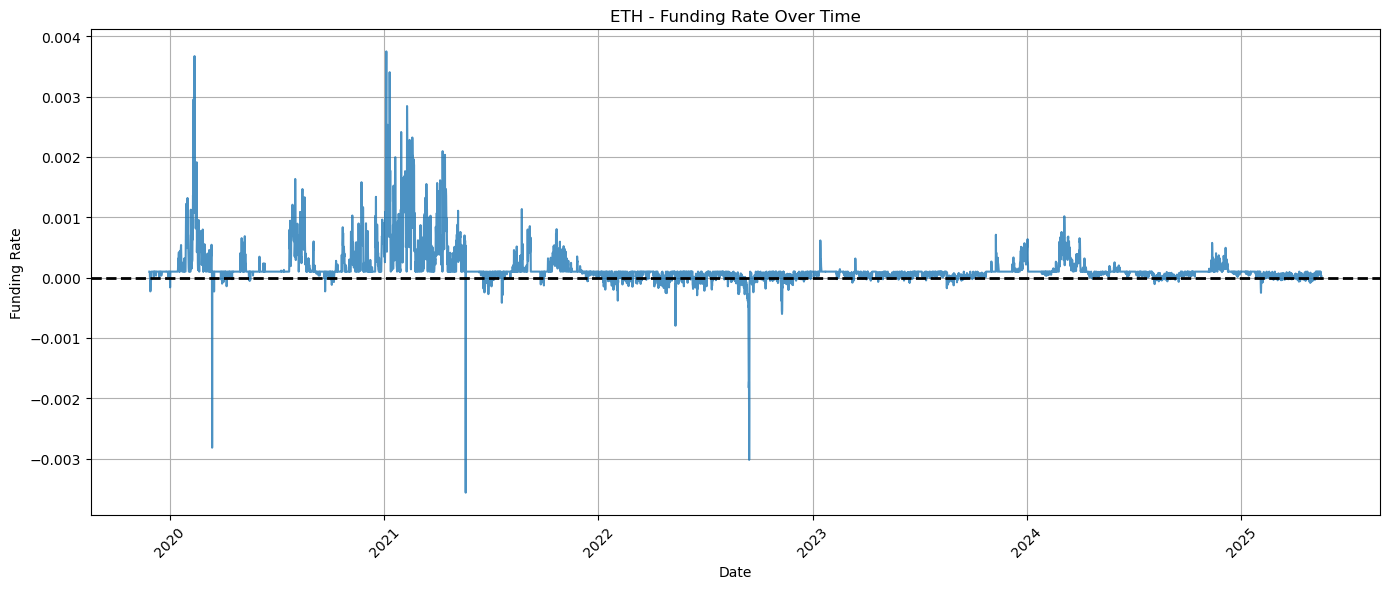

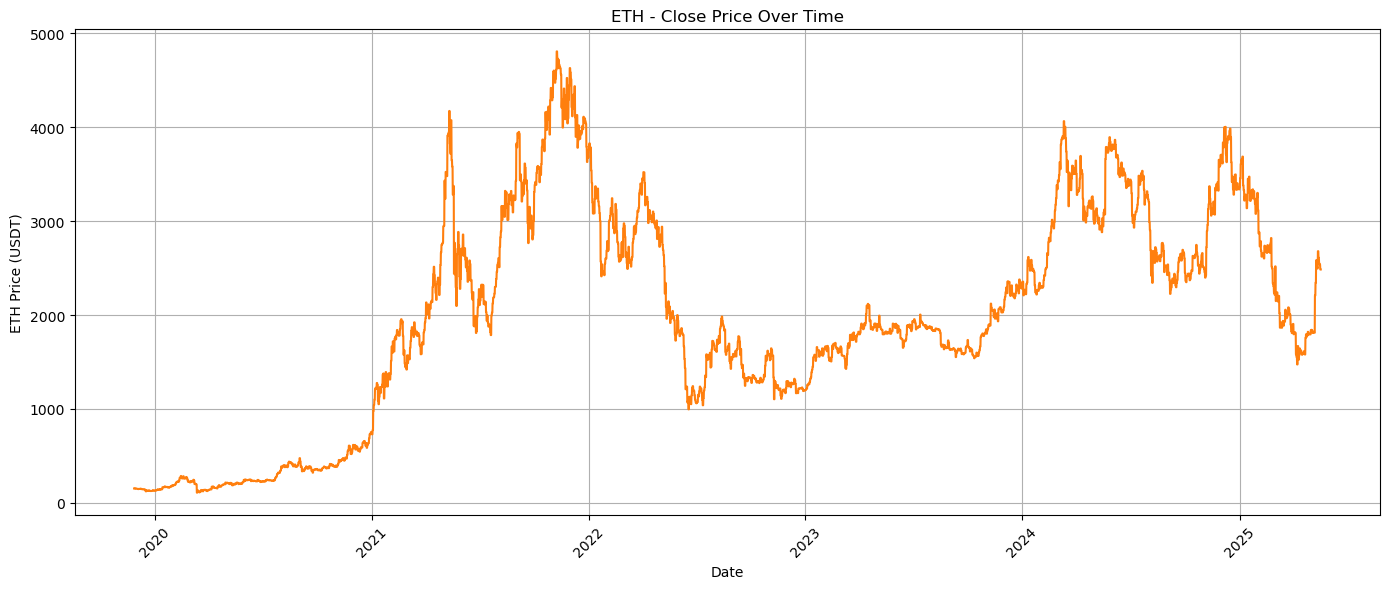

Saved plots to:
 - data/images/ETH_funding_rate.png
 - data/images/ETH_close_price.png


In [78]:
plot_funding_and_price(df_eth, 'ETH')

In [79]:
from src.data.get_data import compute_funding_performance

# Define position size (e.g., 1 unit of asset)
position_size = 1

# BTC
df_btc = compute_funding_performance(df_btc, position_size)

# ETH
df_eth = compute_funding_performance(df_eth, position_size)


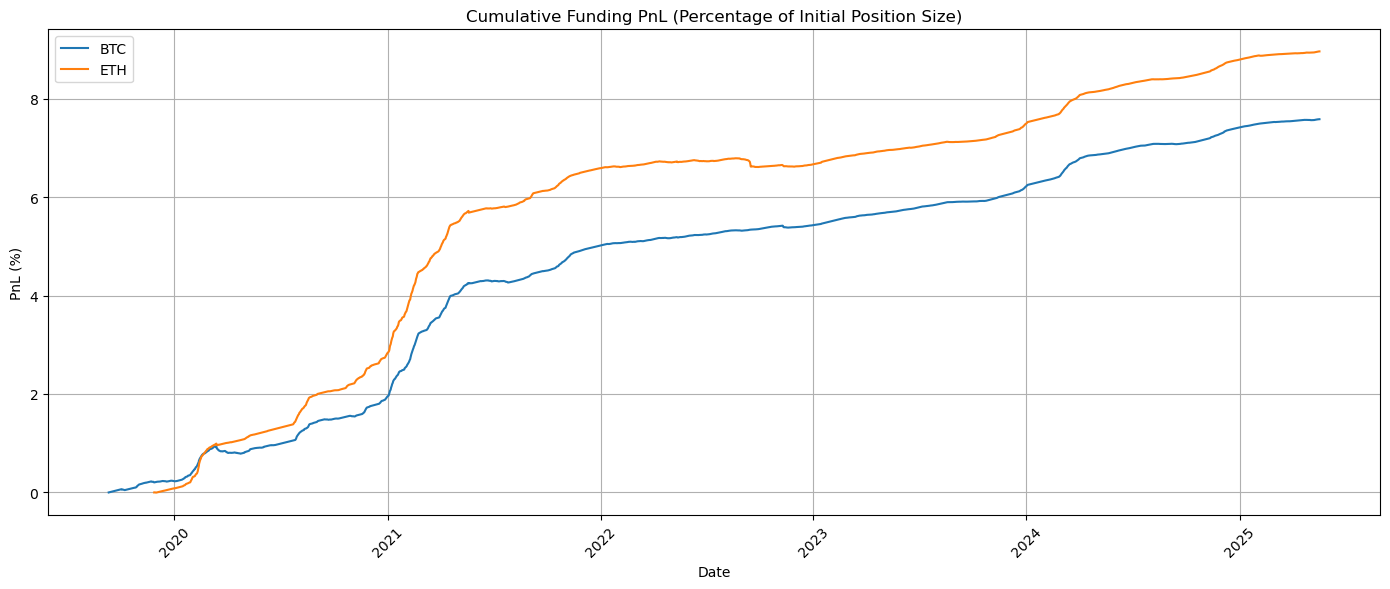

Saved cumulative PnL plot to: data/images/cumulative_funding_pnl.png


In [80]:
from src.utils.plot_data import plot_cumulative_funding_pnl

dfs = {
    'BTC': df_btc,
    'ETH': df_eth
}

plot_cumulative_funding_pnl(dfs)

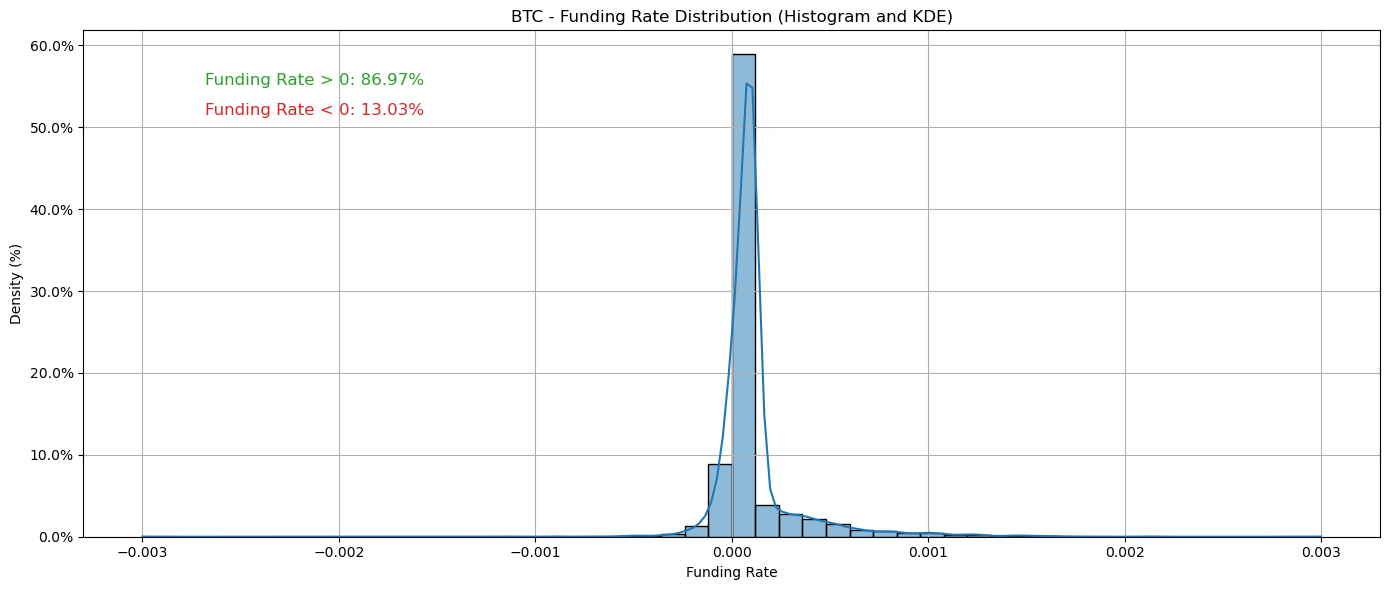

Funding Rate > 0: 86.97%
Funding Rate < 0: 13.03%
Saved plot to: data/images/BTC_funding_rate_distribution.png


In [81]:
from src.utils.plot_data import plot_funding_rate_distribution

plot_funding_rate_distribution(df_btc, 'BTC')

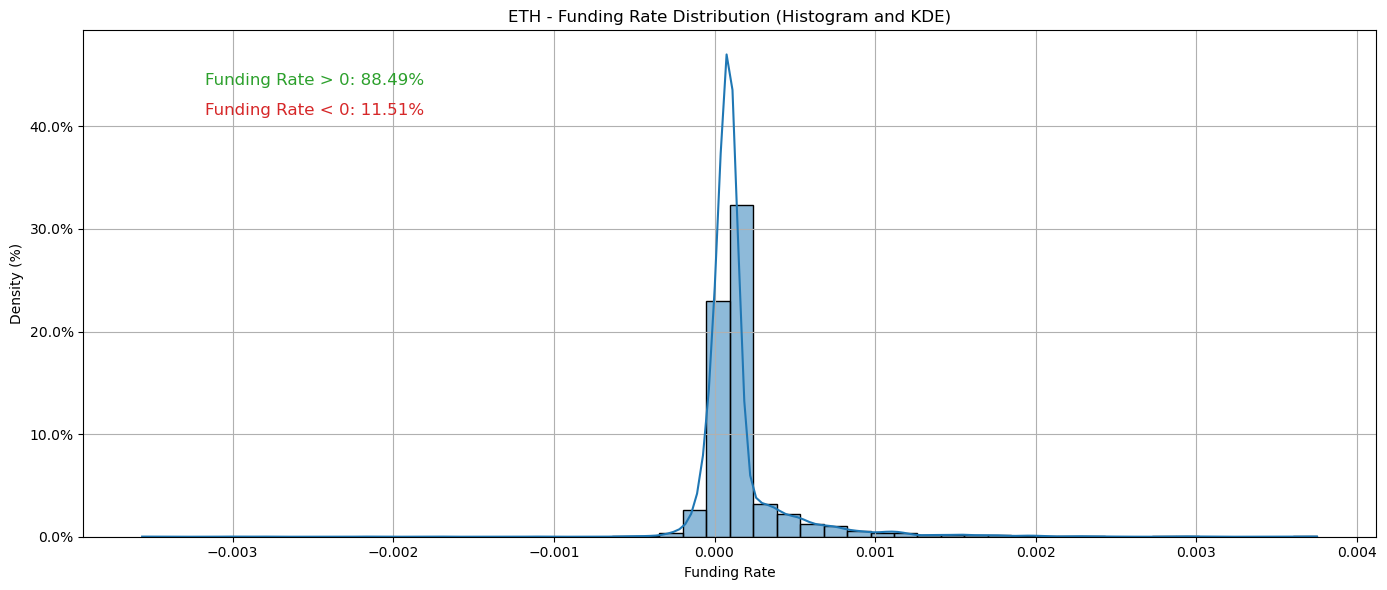

Funding Rate > 0: 88.49%
Funding Rate < 0: 11.51%
Saved plot to: data/images/ETH_funding_rate_distribution.png


In [82]:
plot_funding_rate_distribution(df_eth, 'ETH')

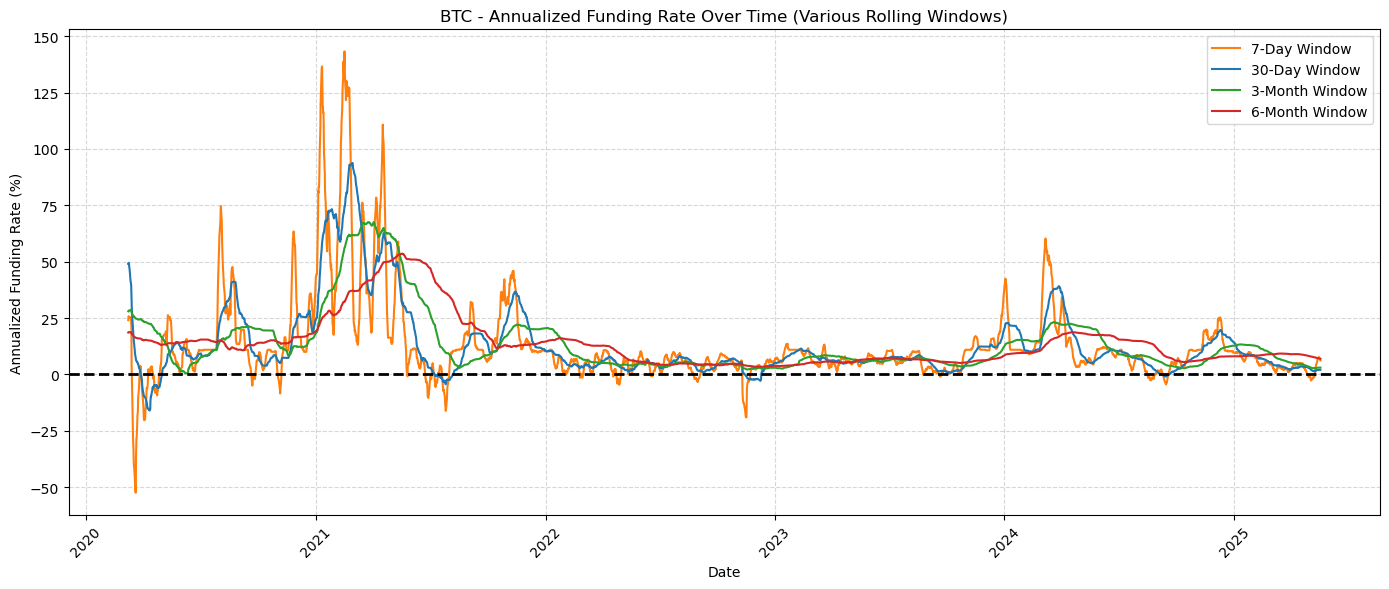

Saved plot to: data/images/BTC_funding_rate_rolling.png


In [83]:
from src.utils.plot_data import plot_annualized_funding_rate

plot_annualized_funding_rate(df_btc, 'BTC')

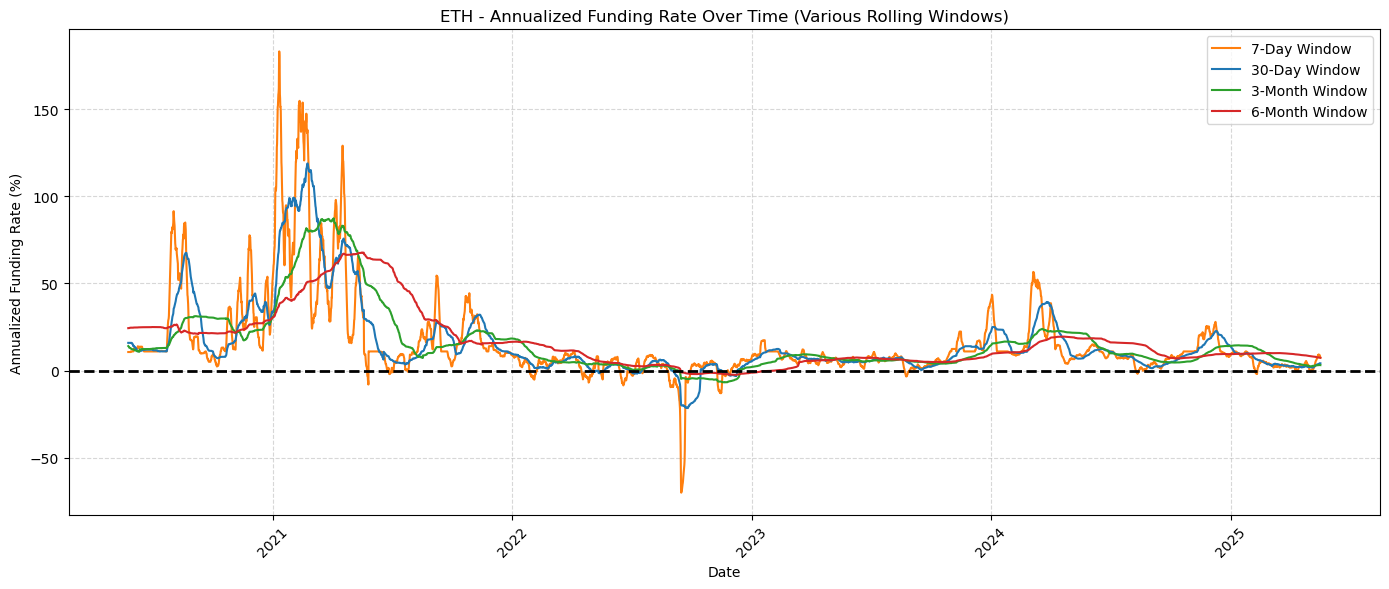

Saved plot to: data/images/ETH_funding_rate_rolling.png


In [84]:
plot_annualized_funding_rate(df_eth, 'ETH')

In [13]:
from src.data.get_data import save_dune_query_to_csv, load_csv_to_df

# Load .env variables
load_dotenv()

QUERY_ID = 570874
LIDO_ETH_APR_CSV_PATH = "data/lido_eth_apr_history.csv"

# Save data to CSV
save_dune_query_to_csv(DUNE_API_KEY, QUERY_ID, LIDO_ETH_APR_CSV_PATH)

NameError: name 'DUNE_API_KEY' is not defined

In [85]:
from src.data.get_data import load_csv_to_df

df_lido_apr = load_csv_to_df(LIDO_ETH_APR_CSV_PATH)
df_lido_apr

📂 Loaded 958 rows from data/lido_eth_apr_history.csv


,Lido staking APR(instant),Lido staking APR(ma_30),Lido staking APR(ma_7),protocol APR(ma_7),protocol_apr,time
0,2.785843,3.008087,2.901742,3.224158,3.095381,2025-04-17 12:23:59+00:00
1,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47+00:00
2,2.830437,3.003347,3.045377,3.383752,3.144930,2025-04-15 12:21:59+00:00
3,2.974651,2.999421,3.086773,3.429748,3.305168,2025-04-14 12:26:11+00:00
4,2.841712,2.993354,3.711069,4.123410,3.157458,2025-04-13 12:24:59+00:00
...,...,...,...,...,...,...
953,3.881250,3.881875,3.881875,4.313194,4.312500,2022-09-05 12:22:07+00:00
954,3.882292,3.882031,3.882031,4.313368,4.313657,2022-09-04 12:18:25+00:00
955,3.873958,3.881944,3.881944,4.313272,4.304398,2022-09-03 12:23:50+00:00
956,3.884375,3.885937,3.885937,4.317708,4.315972,2022-09-02 12:24:24+00:00


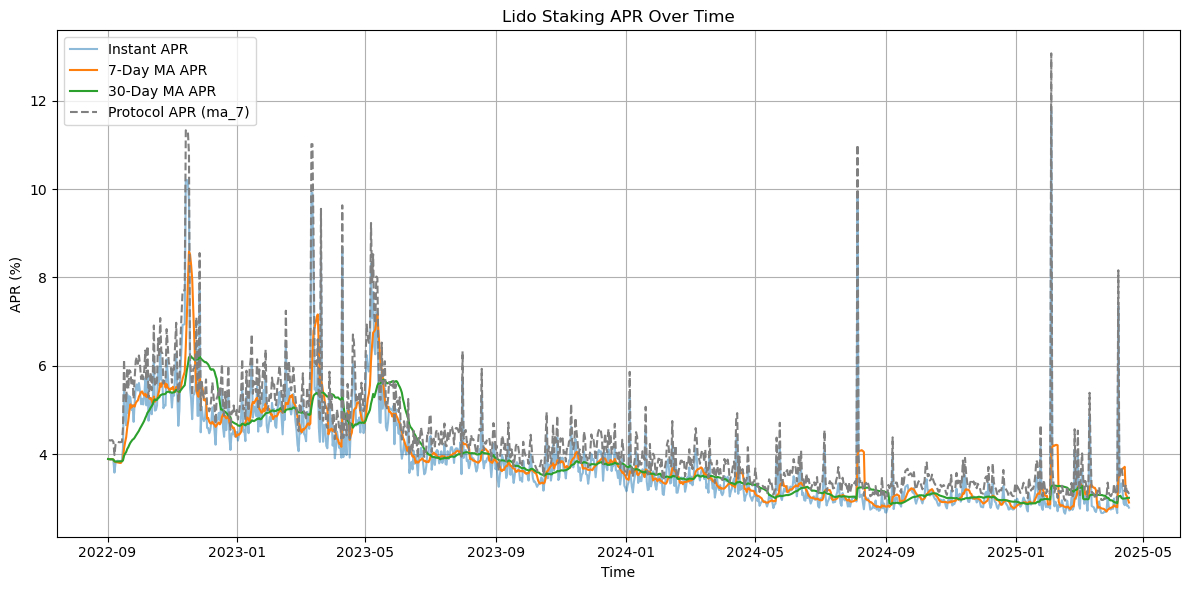

In [86]:
from src.utils.plot_data import plot_lido_apr

plot_lido_apr(df_lido_apr)

In [87]:
from src.data.get_data import merge_funding_rates_and_apr_data

df_merged_eth = merge_funding_rates_and_apr_data(df_eth, df_lido_apr)
df_merged_eth

,timestamp,fundingRate,closePrice,fundingPnL,cumulativeFundingPnL,cumulativeReturnPct,cumulativeFundingPnL_pct,date_x,Lido staking APR(instant),Lido staking APR(ma_30),Lido staking APR(ma_7),protocol APR(ma_7),protocol_apr,time,date_y,cumulativeFundingAPRPnL
0,2022-09-01 00:00:00.012,-0.000013,1586.16,-0.000013,0.676972,0.443567,6.768725,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564472
1,2022-09-01 08:00:00.000,0.000009,1586.16,0.000009,0.676982,0.443573,6.768816,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564482
2,2022-09-01 16:00:00.013,-0.000080,1586.16,-0.000080,0.676902,0.443521,6.768017,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564402
3,2022-09-02 00:00:00.002,0.000055,1575.35,0.000055,0.676956,0.443557,6.768564,2022-09-02,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564456
4,2022-09-02 08:00:00.013,0.000033,1575.35,0.000033,0.676989,0.443578,6.768893,2022-09-02,3.884375,3.885937,3.885937,4.317708,4.315972,2022-09-02 12:24:24,2022-09-02,4.561364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2025-04-16 08:00:00.000,-0.000030,1577.14,-0.000030,0.892454,0.584756,8.923543,2025-04-16,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727343
2870,2025-04-16 16:00:00.000,-0.000025,1577.14,-0.000025,0.892429,0.584739,8.923292,2025-04-16,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727318
2871,2025-04-17 00:00:00.001,0.000045,1583.62,0.000045,0.892474,0.584769,8.923740,2025-04-17,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727363
2872,2025-04-17 08:00:00.000,0.000052,1583.62,0.000052,0.892526,0.584803,8.924258,2025-04-17,2.785843,3.008087,2.901742,3.224158,3.095381,2025-04-17 12:23:59,2025-04-17,3.678369


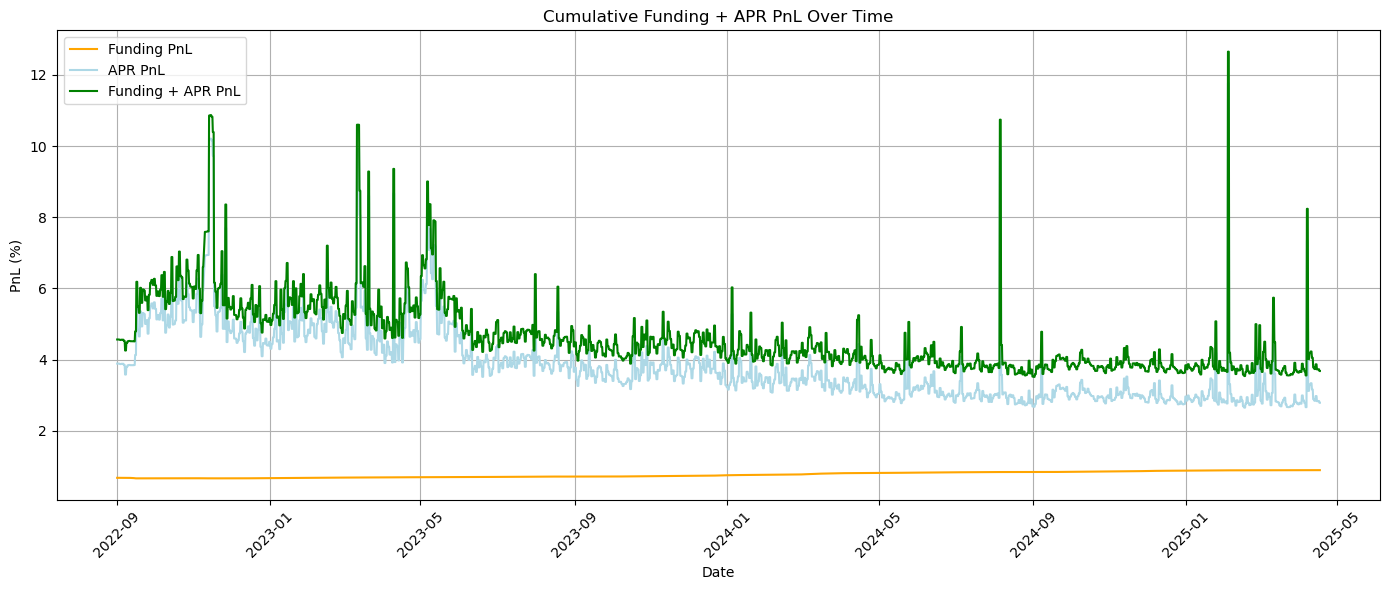

Saved cumulative Funding + APR PnL plot to: data/images/cumulative_funding_apr_pnl.png


In [88]:
from src.utils.plot_data import plot_cumulative_funding_apr_pnl

plot_cumulative_funding_apr_pnl(df_merged_eth)

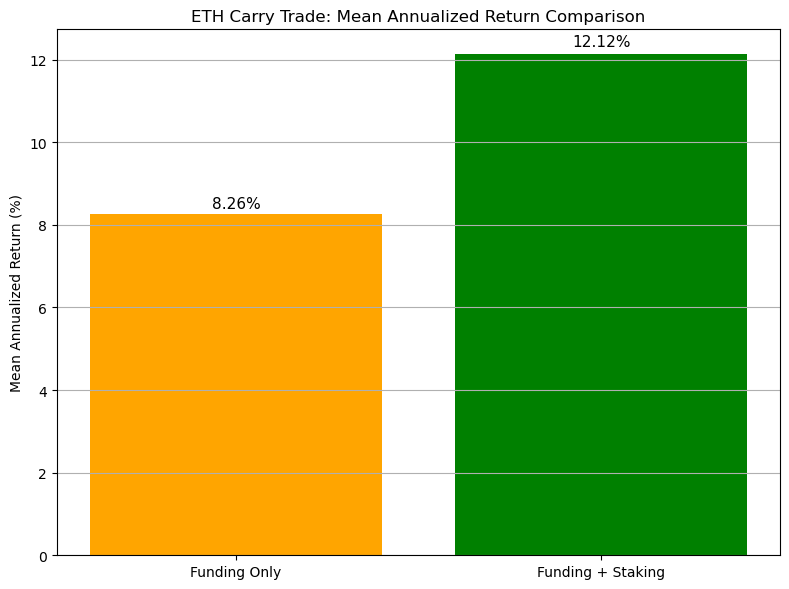

Saved bar chart comparing annualized returns to: data/images/annualized_return_comparison.png


In [91]:
from src.utils.plot_data import plot_annualized_return_comparison

plot_annualized_return_comparison(df_merged_eth)

/Users/matthiaswyss/Documents/EPFL/2024-25/MA2/FIN-413 Financial applications of blockchains and distributed ledgers/Final project/Crypto-carrotte/src/data/get_full_data_coinglass.py:1059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['timestamp'] = pd.to_numeric(spot_df['timestamp'], errors='coerce')
/Users/matthiaswyss/Documents/EPFL/2024-25/MA2/FIN-413 Financial applications of blockchains and distributed ledgers/Final project/Crypto-carrotte/src/data/get_full_data_coinglass.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

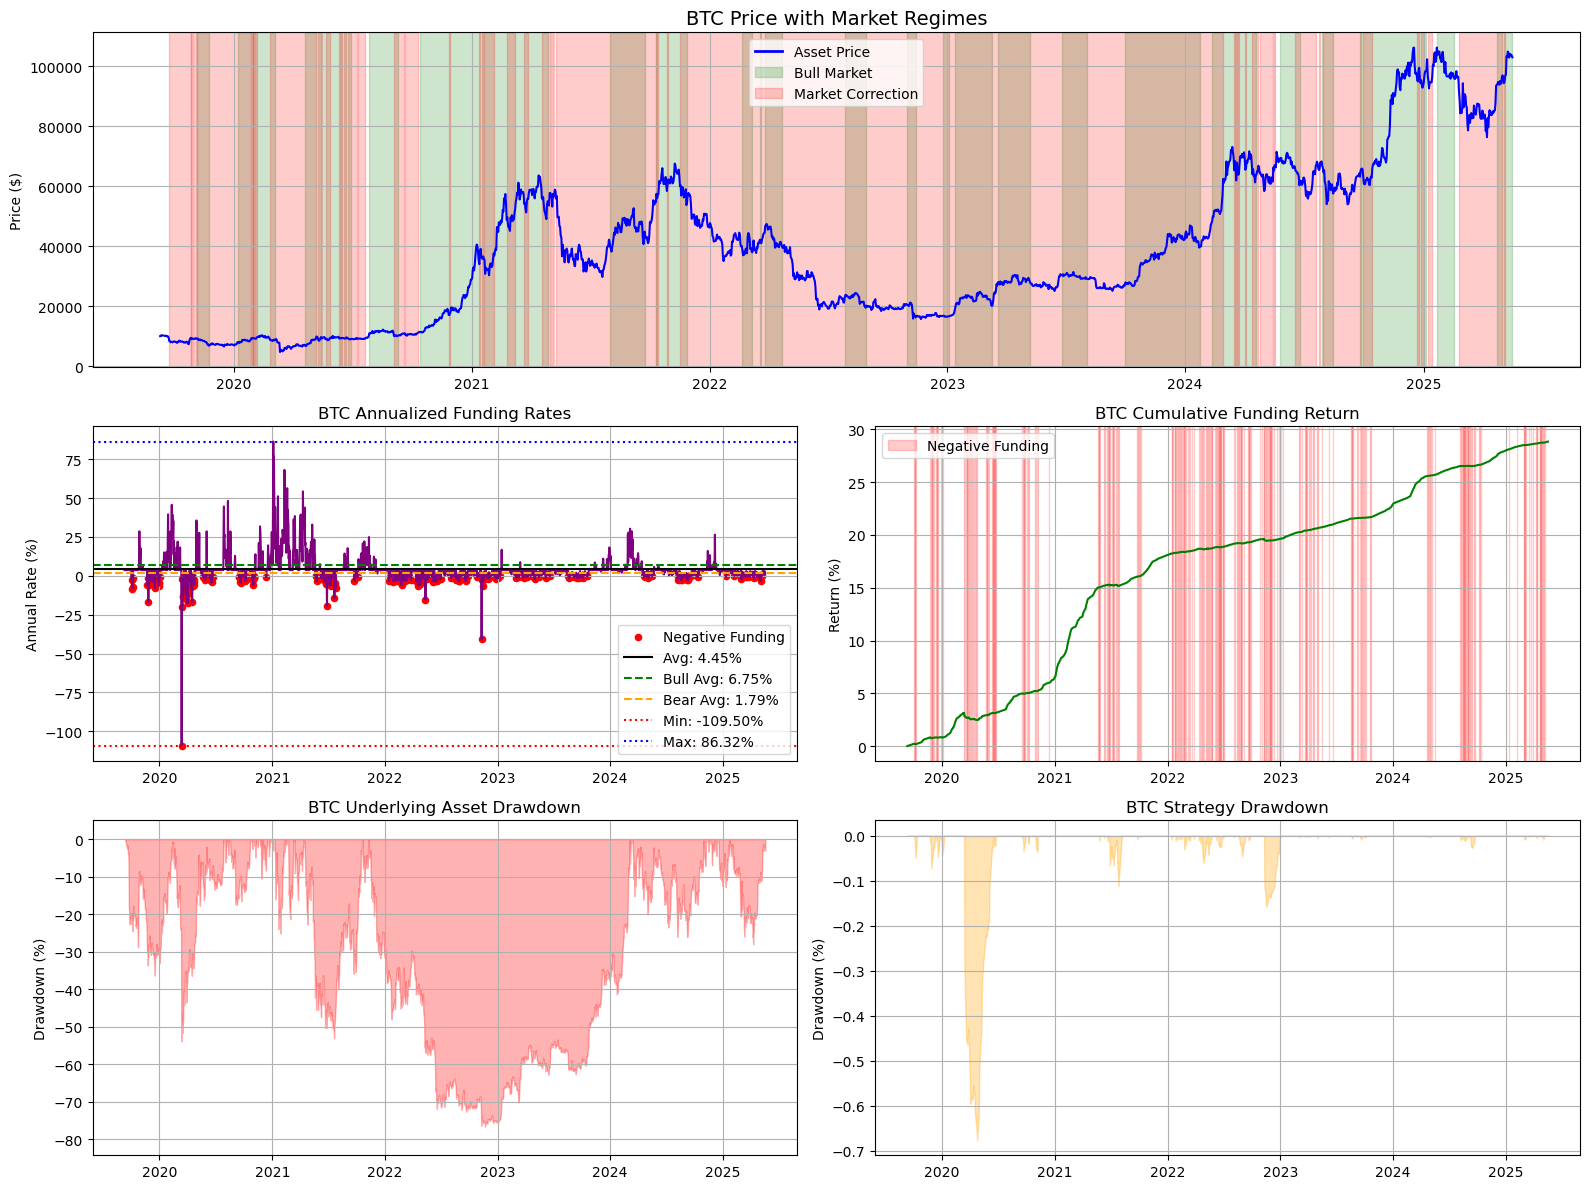

/Users/matthiaswyss/Documents/EPFL/2024-25/MA2/FIN-413 Financial applications of blockchains and distributed ledgers/Final project/Crypto-carrotte/src/data/get_full_data_coinglass.py:1059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['timestamp'] = pd.to_numeric(spot_df['timestamp'], errors='coerce')
/Users/matthiaswyss/Documents/EPFL/2024-25/MA2/FIN-413 Financial applications of blockchains and distributed ledgers/Final project/Crypto-carrotte/src/data/get_full_data_coinglass.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

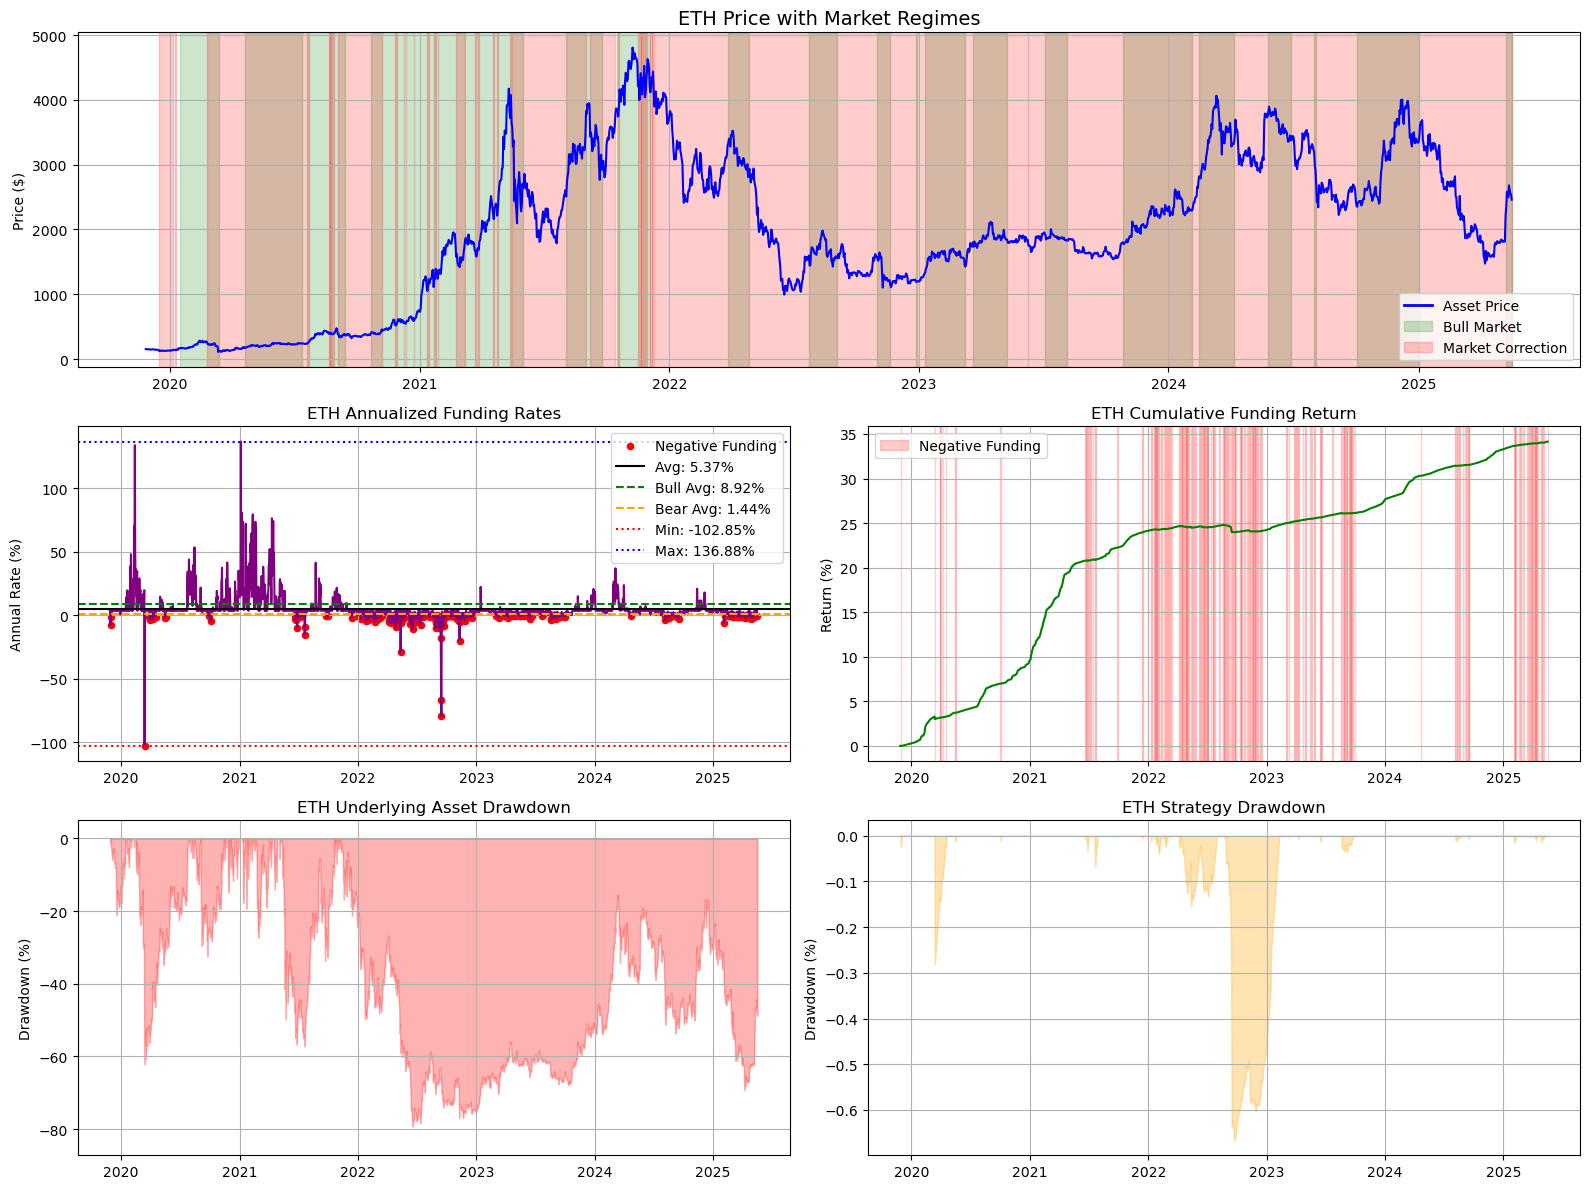

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2019-09-10,2019-11-27
2,End Date,2025-05-17,2025-05-17
3,Total Days,2076,1998
4,Years,5.6876712328767125,5.473972602739726
5,Price Information,,None
6,Entry Price,10098.15,152.62
7,Exit Price,102878.94,2459.85
8,Underlying Asset Performance,,None
9,Total Return,918.79%,1511.75%


In [8]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd
from src.data.get_data import load_data

df_btc = load_data("BTCUSDT")
df_eth = load_data("ETHUSDT")

df_btc = df_btc[::3]
df_eth = df_eth[::3]

df_btc['fundingRate'] *= 100
df_eth['fundingRate'] *= 100

df_btc.rename(columns={'fundingRate': 'FR_close'}, inplace=True)
df_btc.rename(columns={'closePrice': 'SP_close'}, inplace=True)
df_btc['date'] = pd.to_datetime(df_btc['timestamp'])

df_eth.rename(columns={'fundingRate': 'FR_close'}, inplace=True)
df_eth.rename(columns={'closePrice': 'SP_close'}, inplace=True)
df_eth['date'] = pd.to_datetime(df_eth['timestamp'])

# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(df_btc[['timestamp', 'SP_close', 'date']], df_btc[['timestamp', 'FR_close', 'date']], merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(df_eth[['timestamp', 'SP_close', 'date']], df_eth[['timestamp', 'FR_close', 'date']], merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)
